loss 0 2.2026532091961806
accuracy 0 0.56
loss 1 2.187683349626609
accuracy 1 0.5733333333333334
loss 2 2.1728588081322164
accuracy 2 0.58
loss 3 2.158175663782875
accuracy 3 0.58
loss 4 2.143630107258616
accuracy 4 0.5933333333333334
loss 5 2.1292184400104217
accuracy 5 0.5933333333333334
loss 6 2.1149370732914887
accuracy 6 0.5933333333333334
loss 7 2.100782527075354
accuracy 7 0.5933333333333334
loss 8 2.086751428875879
accuracy 8 0.5933333333333334
loss 9 2.0728405124829625
accuracy 9 0.6
loss 10 2.0590466166266386
accuracy 10 0.6
loss 11 2.0453666835811415
accuracy 11 0.6
loss 12 2.031797757719518
accuracy 12 0.6
loss 13 2.0183369840283873
accuracy 13 0.6
loss 14 2.0049816065915644
accuracy 14 0.6
loss 15 1.9917289670504326
accuracy 15 0.6
loss 16 1.9785765030481672
accuracy 16 0.6
loss 17 1.9655217466641874
accuracy 17 0.6
loss 18 1.9525623228445534
accuracy 18 0.6
loss 19 1.939695947833374
accuracy 19 0.6
loss 20 1.9269204276097518
accuracy 20 0.6
loss 21 1.9142336563342137
accu

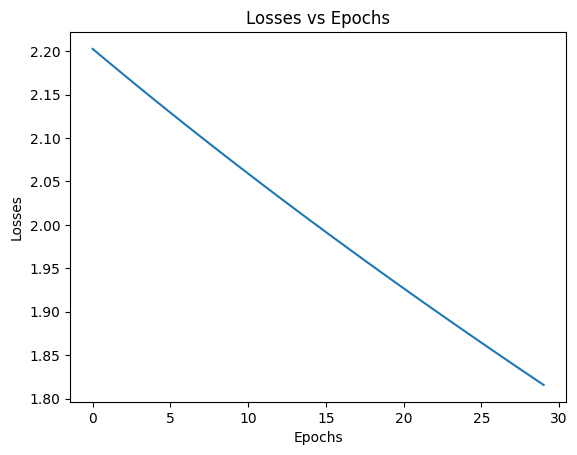

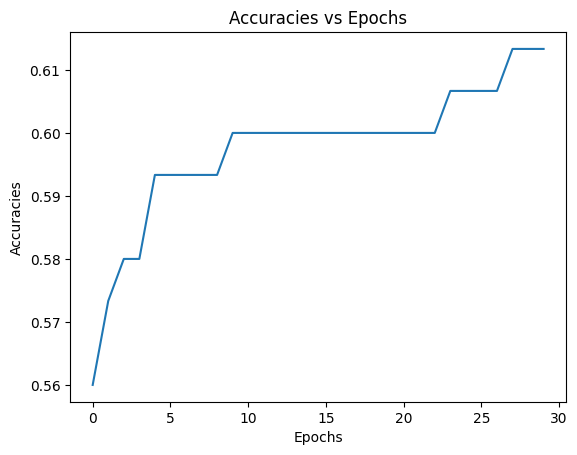

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import scale


# NOTICE!!!! The data/hidden units
# are in shape of (dimension, num_data).
# For example, for input data of size (4, 150),
# multiply with the first layer matrix of size (20, 4)
# gives you the first layer hidden units of size (20, 150).

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def accuracy(y, y_hat):
    return np.sum(y == np.argmax(y_hat, axis=0) ) / float(len(y))

def softmax(X):
    exps = np.exp(X - np.max(X))
    return exps / np.sum(exps, axis = 0)


# forward pass
# z is the neuron before activation
# a is the neuron after activation, i.e. a = \psi(z)
def fprop(x, y, params):
    W1, b1, W2, b2 = [params[key] for key in ('W1', 'b1', 'W2', 'b2')]
    z1 = np.dot(W1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = softmax(z2)
    # cross-entropy loss
    log_likelihood = -np.log(a2[y, range(len(y))])
    loss = np.sum(log_likelihood) / len(y)

    ret = {'x': x, 'y': y, 'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2, 'loss': loss}
    for key in params:
        ret[key] = params[key]
    return ret

# back-propagation
def bprop(fprop_cache):
    x, y, z1, a1, z2, a2, loss = [fprop_cache[key] for key in ('x', 'y', 'z1', 'a1', 'z2', 'a2', 'loss')]
    # TODO: complete the back-propagation and store the gradients
    # in the variables:
    # i.e., db1 is the gradient for b1 (d means partial gradient)
    # return {'b1': db1, 'W1': dW1, 'b2': db2, 'W2': dW2}
    dz2 = a2.copy()
    dz2[y, range(len(y))] -= 1
    dz2 /= len(y)

    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(W2.T, dz2) * (a1 * (1 - a1))
    dW1 = np.dot(dz1, x.T)
    db1 = np.sum(dz1, axis=1, keepdims=True)

    # Store the gradients
    return {'b1': db1, 'W1': dW1, 'b2': db2, 'W2': dW2}



# get train data
iris = datasets.load_iris()
X = iris.data
# normalize data
X = scale(X)
y = iris.target
num_classes = len(set(y))

# You can change the hyper-parameters
# and run several times to get desirable performance.
num_hidden_units = 20
num_epoch = 30
lr = 1e-2

# initialize random parameters and inputs
W1 = np.random.randn(num_hidden_units, X.shape[1])
b1 = np.random.randn(num_hidden_units, 1)
W2 = np.random.randn(num_classes, num_hidden_units)
b2 = np.random.randn(num_classes, 1)
params = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}


# We are doing batch gradient descent and only report the training
# losses and accuracies.
losses = []
accuracies = []
for ii in range(num_epoch):
  fprop_cache = fprop(X.T, y, params)
  print("loss", ii, fprop_cache['loss'])
  print("accuracy", ii, accuracy(y, fprop_cache['a2']))
  losses.append(fprop_cache['loss'])
  accuracies.append(accuracy(y, fprop_cache['a2']))

  bprop_cache = bprop(fprop_cache)

  for key in params:
    params[key] -= np.mean(bprop_cache[key], axis = 1, keepdims=True) * lr

# Plot losses vs epochs
plt.plot(range(num_epoch), losses)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Losses vs Epochs')
plt.show()

# Plot accuracies vs epochs
plt.plot(range(num_epoch), accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracies')
plt.title('Accuracies vs Epochs')
plt.show()